<a href="https://colab.research.google.com/github/liudmylasovetovs/goit-algo-hw-10/blob/main/%D0%94%D0%9710_%D0%A1%D0%BE%D0%B2%D1%94%D1%82%D0%BE%D0%B2%D1%81_%D0%9B%D1%8E%D0%B4%D0%BC%D0%B8%D0%BB%D0%B0_%D0%92%D0%BE%D0%BB%D0%BE%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1. Оптимізація виробництва

Компанія виробляє два види напоїв: "Лимонад" і "Фруктовий сік". Для виробництва цих напоїв використовуються різні інгредієнти та обмежена кількість обладнання. Задача полягає у максимізації виробництва, враховуючи обмежені ресурси.

# Умови завдання:

1. "Лимонад" виготовляється з "Води", "Цукру" та "Лимонного соку".
2. "Фруктовий сік" виготовляється з "Фруктового пюре" та "Води".
3. Обмеження ресурсів: 100 од. "Води", 50 од. "Цукру", 30 од. "Лимонного соку" та 40 од. "Фруктового пюре".
4. Виробництво одиниці "Лимонаду" вимагає 2 од. "Води", 1 од. "Цукру" та 1 од. "Лимонного соку".
5. Виробництво одиниці "Фруктового соку" вимагає 2 од. "Фруктового пюре" та 1 од. "Води".

Використовуючи PuLP, створіть модель, яка визначає, скільки "Лимонаду" та "Фруктового соку" потрібно виробити для максимізації загальної кількості продуктів, дотримуючись обмежень на ресурси. Напишіть програму, код якої максимізує загальну кількість вироблених продуктів "Лимонад" та "Фруктовий сік", враховуючи обмеження на кількість ресурсів.

In [ ]:
pip install pulp

In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable

In [ ]:
# Створення моделі
model = LpProblem(name="production_optimization", sense=LpMaximize)

In [ ]:
# Оголошення змінних рішення
lemonade = LpVariable(name="lemonade", lowBound=0, cat="Integer")
fruit_juice = LpVariable(name="fruit_juice", lowBound=0, cat="Integer")

In [ ]:
# Функція максимізації (загальна кількість продуктів)
model += lemonade + fruit_juice, "total_production"

In [ ]:
# Обмеження на ресурси
model += 2 * lemonade + fruit_juice <= 100, "water_constraint"
model += lemonade <= 50, "sugar_constraint"
model += lemonade <= 30, "lemon_juice_constraint"
model += 2 * fruit_juice <= 40, "fruit_puree_constraint"

In [ ]:
# Виробництво одиниці продукції
model += 2 * lemonade + 1 * fruit_juice <= 100, "water_usage"
model += 1 * lemonade <= 50, "sugar_usage"
model += 1 * lemonade <= 30, "lemon_juice_usage"
model += 1 * fruit_juice <= 40, "fruit_puree_usage"

In [ ]:
# Розв'язання моделі
model.solve()

In [ ]:
# Вивід результатів
print(f"Optimal production of Lemonade: {lemonade.varValue} units")
print(f"Optimal production of Fruit Juice: {fruit_juice.varValue} units")

# Завдання 2. Обчислення визначеного інтеграла.

Ваше друге завдання полягає в обчисленні значення інтеграла функції методом Монте-Карло.

INFO
📖 Можете обрати функцію на власний розсуд.

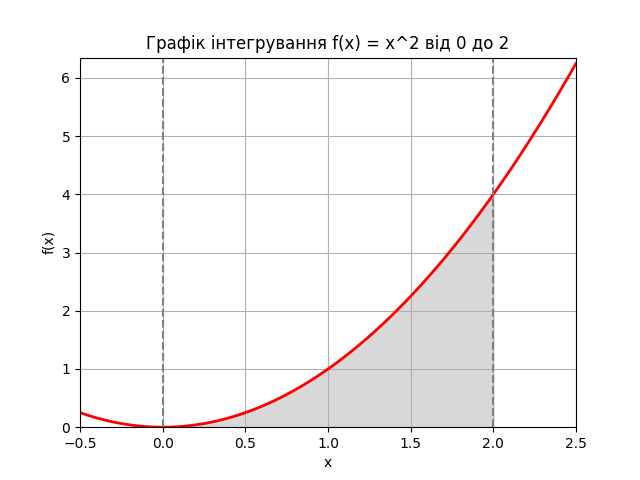

1. Обчисліть значення інтеграла функції за допомогою методу Монте-Карло, інакше кажучи, знайдіть площу під цим графіком (сіра зона).
2. Перевірте правильність розрахунків, щоб підтвердити точність методу Монте-Карло, шляхом порівняння отриманого результату та аналітичних розрахунків або результату виконання функції quad. Зробіть висновки.

INFO
📖 Для перевірки обчислення визначеного інтеграла в Python ви можете використовувати бібліотеку SciPy, зокрема її функцію quad з підмодуля integrate. Спочатку необхідно визначити функцію, яку ви хочете інтегрувати, а потім використати quad для обчислення інтеграла на заданому інтервалі.



In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [ ]:
# Визначення функції та меж інтегрування
def f(x):
    return x ** 2

a = 0  # Нижня межа
b = 2  # Верхня межа

In [ ]:
# Кількість випадкових точок для методу Монте-Карло
num_points = 100000

In [ ]:
# Генерація випадкових точок в прямокутній області
x_points = np.random.uniform(a, b, num_points)
y_points = np.random.uniform(0, max(f(x_points)), num_points)

In [ ]:
# Обчислення кількості точок, які опинились під кривою
points_under_curve = sum(y_points <= f(x_points))

In [ ]:
# Обчислення відношення точок під кривою до загальної кількості точок
ratio = points_under_curve / num_points

In [ ]:
# Обчислення площі прямокутника та площі під кривою
rectangle_area = (b - a) * max(f(x_points))
area_under_curve = ratio * rectangle_area

In [ ]:
# Обчислення інтеграла за допомогою quad для порівняння
quad, error = spi.quad(f, a, b)
quad, error

In [ ]:
# Малювання графіка
x = np.linspace(-0.5, 2.5, 400)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.fill_between(x_points, y_points, color='gray', alpha=0.3)
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axvline(x=a, color='gray', linestyle='--')
ax.axvline(x=b, color='gray', linestyle='--')
ax.set_title('Графік інтегрування f(x) = x^2 від ' + str(a) + ' до ' + str(b))
plt.grid()
plt.show()

In [ ]:
# Виведення результатів
print("Метод Монте-Карло: ", area_under_curve)
print("Функція quad: ", quad)

***Висновки щодо обчислення інтеграла методом Монте-Карло***

**Завдання та вхідні дані**

Задача полягала в обчисленні визначеного інтеграла функції за допомогою методу Монте-Карло. Для порівняння точності результатів використовувалася також бібліотека SciPy, зокрема функція quad для аналітичного обчислення інтеграла.

**Обчислення методом Монте-Карло**

Для методу Монте-Карло було згенеровано 100,000 випадкових точок в прямокутній області, обмеженій графіком функції та межами інтегрування. Область під кривою була оцінена за допомогою відношення кількості точок, які опинились під кривою, до загальної кількості точок. Отримана площа була помножена на площу прямокутника для обчислення значення інтеграла.

**Результати та порівняння**

Результат обчислення інтеграла методом Монте-Карло складає 2.665, тоді як використання функції quad дало значення 2.666666666666667 з оцінкою помилки
2.960594732333751e−14. Помилка методу Монте-Карло може залежати від кількості випадкових точок, і, можливо, з додатковим налаштуванням кількості точок можна досягти більшої точності.

**Висновки**

Метод Монте-Карло надав досить точний результат порівняно з аналітичним обчисленням, але точність може залежати від кількості випадкових точок.
За результатами порівняння можна стверджувати, що метод Монте-Карло в даному випадку надає прийнятний результат, особливо з урахуванням його простоти та використання обчислювальних ресурсів.